In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint


In [2]:
(x_train_img, y_train_label), (x_test_img, y_test_label) = mnist.load_data()
x_train = x_train_img.reshape(60000, 784).astype('float32')
x_test = x_test_img.reshape(10000, 784).astype('float32')
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [3]:
model = inputs = Input(shape=784)
model = Dense(512, activation='relu')(model)
model = Dense(256, activation='relu')(model)
model = Dense(128, activation='relu')(model)
model = Dense(64, activation='relu')(model)
enc_out = Dense(20, activation='sigmoid')(model)

model = Dense(64, activation='relu')(enc_out)
model = Dense(128, activation='relu')(model)
model = Dense(256, activation='relu')(model)
model = Dense(512, activation='relu')(model)
dec_out = Dense(784, activation='relu')(model)

auto_encoder = Model(inputs=inputs, outputs=dec_out)
auto_encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1300      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1344  

In [4]:
weight_path = 'weights/mdl_20220530_weights.h5'
model_checkpoint = ModelCheckpoint(
    filepath=weight_path,
    save_weights_only=True,
    monitor='loss',
    save_best_only=True
)

In [5]:
auto_encoder.compile(
    optimizer='adam',
    loss='MSE'
)
train_history = auto_encoder.fit(
    x_train_normalize,
    x_train_normalize,
    batch_size=1024,
    epochs=200,
    callbacks=[model_checkpoint]
)

Epoch 1/200
59/59 [==============================] - 1s 6ms/step - loss: 0.0882
Epoch 2/200
59/59 [==============================] - 0s 6ms/step - loss: 0.0666
Epoch 3/200
59/59 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 4/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0352
Epoch 5/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0305
Epoch 6/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0269
Epoch 7/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0245
Epoch 8/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0229
Epoch 9/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0212
Epoch 10/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0199
Epoch 11/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0188
Epoch 12/200
59/59 [==============================] - 0s 5ms/step - loss: 0.0179
Epoch 13/200
59/59 [=================

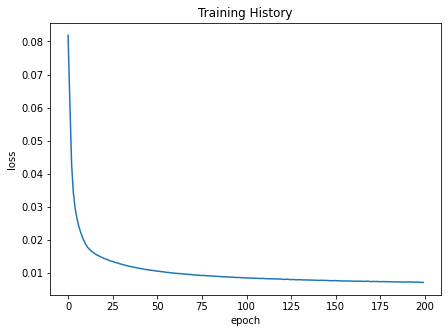

In [22]:
plt.figure(figsize=(7, 5))
plt.plot(train_history.history['loss'])
plt.title('Training History')
plt.xlabel('epoch'); plt.ylabel('loss')
plt.show()

In [8]:
auto_encoder.load_weights(weight_path)
auto_encoder.compile(
    optimizer='adam',
    loss='MSE'
)

eval = auto_encoder.evaluate(x_train_normalize, x_train_normalize)
print('loss = {:.4f}'.format(eval))


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0071
loss = 0.0071


In [9]:
x_train_reconstruction = auto_encoder.predict(x_train_normalize)

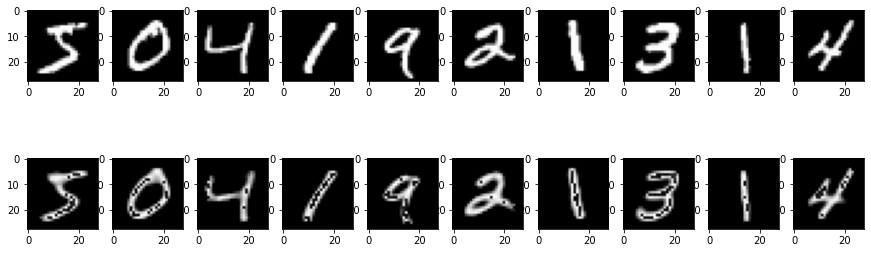

In [20]:
plt.figure(figsize=(15, 5))
for i in range(10):
    image_ori = (x_train_normalize[i].reshape(28, 28) * 255).astype('uint8')
    image_rec = (x_train_reconstruction[i].reshape(28, 28) * 255).astype('uint8')
    plt.subplot(2, 10, 1+i); plt.imshow(image_ori, 'gray')
    plt.subplot(2, 10, 11+i); plt.imshow(image_rec, 'gray')
plt.show()

In [21]:
auto_encoder.save('model/mdl_20220530.h5')